# Predicting Breast Cancer

In this notebook, I am using the 'Breast Cancer Wisconsin (Diagnostic) Data Set', which was originally published in 1995 by Dr. William H. Wolberg, W. Nick Street and Olvi L. Mangasarian from the University fo Wisconsin, Madison. It contains 569 instances of results of the analysis of cell nuclei from fine needle aspirates (FNA) of breast mass. The question at hand is whether the samples can be robustly classified as malign or benign based on the observed cell nuclei characteristics, such as size and volume. The data set can be found in the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).


### Data Cleaning

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


# import data as pandas dataframe
df = pd.read_csv('data.csv')

Let's have a look at the organization of the data: 

In [2]:
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


We see that our labels ('diagnosis' column) are categorical, either 'M' for malignant (cancer) or 'B' for benign or healthy. 

We need to change the diagnosis column such that is of categorical type ('M' for malign and 'B' for benign is coverted to numercial values: 1: cancer, 0: healthy). This is needed for the future use machine learning algorithms, e.g., logistic regression.  

Also, the 'id' column is useless for our purposes, so we can just drop the column.

In [3]:
df['diagnosis'] = df['diagnosis'].astype('category')
df['diagnosis'] = df['diagnosis'].cat.codes

df.drop('id', axis=1, inplace=True)

df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


# Explorative Data Analysis

To get a first idea of which features will be most useful in predicting healthy vs. cancer cells, I will explore the data in the form of histograms. This will illustrate the frequencies of cancer diagnoses for different value ranges of each cell nucleus property.

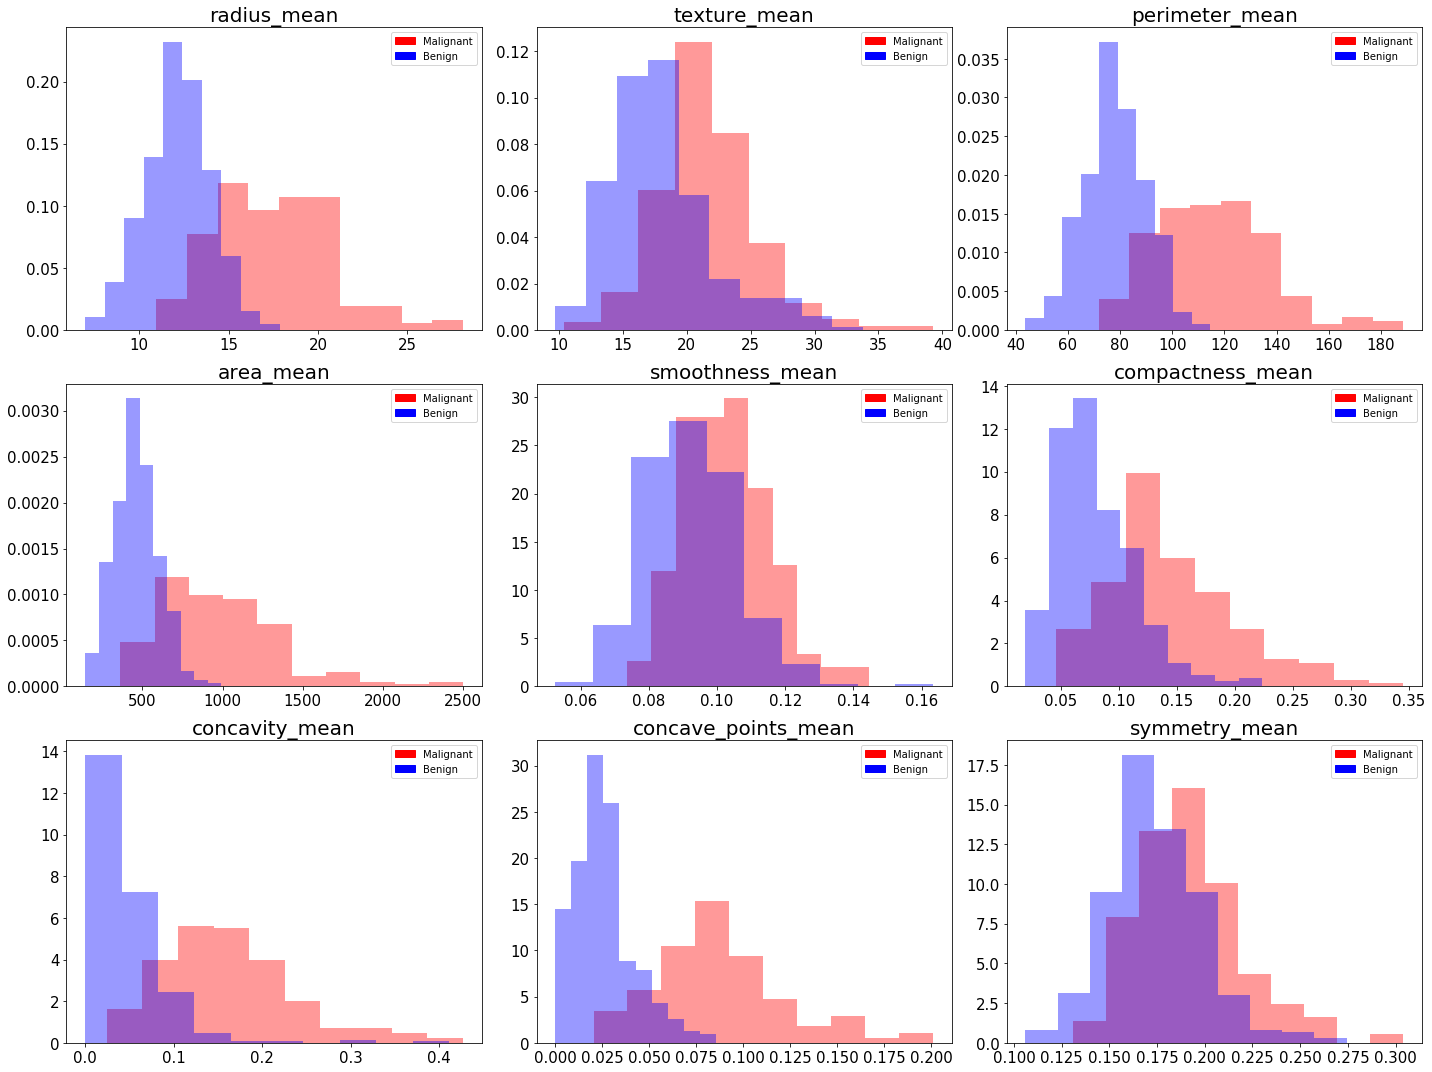

In [4]:
plt.figure(figsize=(20, 15))
for ii, col in enumerate(df.columns[1:10]):
    plt.subplot(3,3,ii+1)
    plt.title(col, fontsize = 20)
    
    plt.tick_params(labelsize = 15)
    plt.legend(handles = [patches.Patch(label = 'Malignant', color='red'),
                          patches.Patch(label = 'Benign', color='blue')])
    b = df[df['diagnosis'] == 0][col]
    m = df[df['diagnosis'] == 1][col]
    plt.hist(m, stacked=True, normed = True, color='red', alpha = 0.4)
    plt.hist(b, stacked=True, normed = True, color='blue', alpha = 0.4)
    
plt.tight_layout()
plt.show()

Another way of illustrating differences between two groups of data (benign, malignant) are box plots or violin plots, which are especially well implemented in seaborn. The following is essentially the same representation as above, but making use of violin plots.

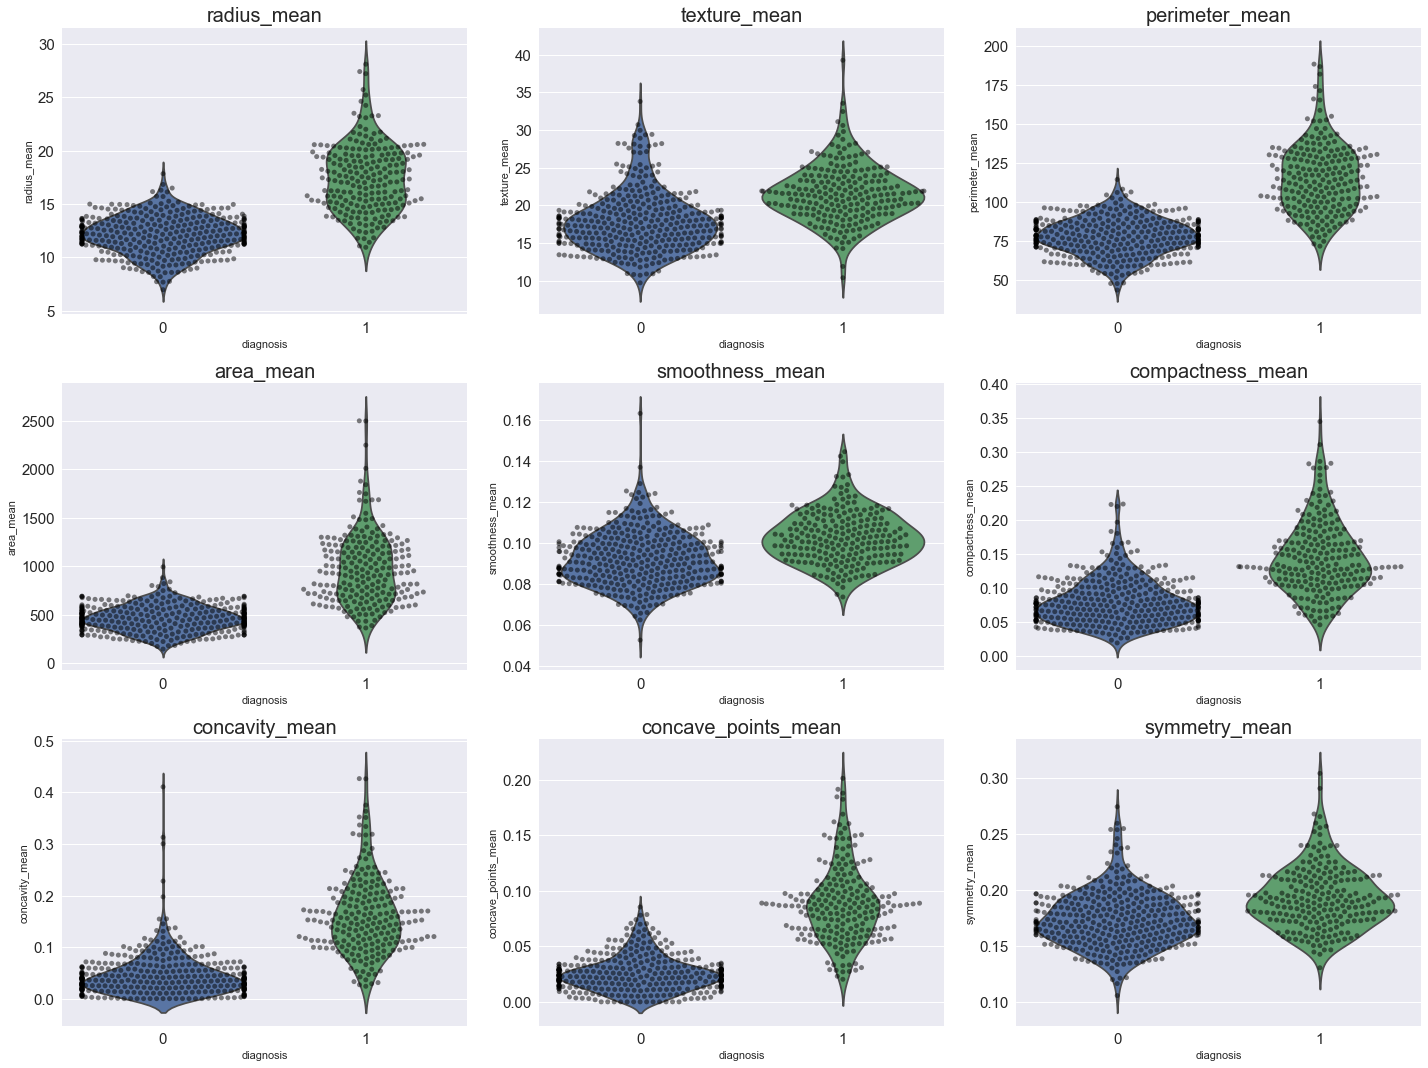

In [5]:
import seaborn as sns
plt.figure(figsize=(20, 15))
for ii, col in enumerate(df.columns[1:10]):
    plt.subplot(3,3,ii+1)
    plt.title(col, fontsize = 20)
    plt.tick_params(labelsize = 15)
    
    
    sns.violinplot(x = "diagnosis", y = col, data = df, inner = None)
    sns.swarmplot(x = "diagnosis", y = col, data = df, color = "black", alpha = .5)
    
plt.tight_layout()
plt.show()

##  Predictive Modeling

Given our observations from the figures above, it is quite obvious that the features that distinguish malignant from benign tumors the most are concave points, radius, perimeter, area and concavity.

Before the data can be fed into machine-learning algorithms, we need a preprocessing step, since the data is not on the same scale, and varies over several orders of magnitude, and some algorithms are susceptible to that (e.g., k-nearest neighbors). scikit-learn has a preprocessing package that can be used to transform the data onto the same scale.

Next, we are splitting our data set into a train and test fraction of 80% and 20%, respectively. 

Lastly, we extract the above mentioned features into a feature vector, in addition to the correspnding labels.

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)

X_test = test.ix[:, 'radius_mean':'symmetry_mean']

#test[['radius_mean', 'area_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'concave_points_mean', 'texture_mean', 'concavity_mean']]
X_train = train.ix[:, 'radius_mean':'symmetry_mean'] 

train[['radius_mean', 'area_mean', 'perimeter_mean', 'compactness_mean', 'symmetry_mean', 'concave_points_mean', 'texture_mean', 'concavity_mean']]

# scaling the data
X_test = preprocessing.scale(X_test)
X_train = preprocessing.scale(X_train)

# normalizing the data
X_test_norm = preprocessing.normalize(X_test)
X_train_norm = preprocessing.normalize(X_train)

y_test = test[['diagnosis']].values.ravel()
y_train = train[['diagnosis']].values.ravel()

Now we can use the exracted features and labels and feed them into machine learning algorithms. Since we have a **classification** problem at hand, a few algorithms come to mind: Logistic regression, k-Nearest Neighbors (kNN), Decision Tree/Random Forest, or Support Vector Machines (SVMs).

### Decision Tree

The most intuitive one is a Decision Tree, which we can run in the following way:

1) Imorting the necessary packages:

In [7]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Create a classifier, train the model with the training data set, and print the details of our model:

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Use the test data set, to check how well the model perfoms outside the training data.

In [9]:
# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
predicted_train = model.predict(X_train)

print('---------------------------------')
print('Training Score')
print(metrics.accuracy_score(y_train, predicted_train))
print(metrics.classification_report(y_train, predicted_train))
print(metrics.confusion_matrix(y_train, predicted_train))
print('---------------------------------')
print('Test Score')
print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print('---------------------------------')
print('Feature Importance: ')
print(model.feature_importances_)

---------------------------------
Training Score
1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       243
          1       1.00      1.00      1.00       155

avg / total       1.00      1.00      1.00       398

[[243   0]
 [  0 155]]
---------------------------------
Test Score
0.906432748538
             precision    recall  f1-score   support

          0       0.95      0.90      0.93       114
          1       0.83      0.91      0.87        57

avg / total       0.91      0.91      0.91       171

[[103  11]
 [  5  52]]
---------------------------------
Feature Importance: 
[ 0.          0.08940032  0.06813353  0.04678083  0.01794146  0.02797571
  0.02080854  0.7289596   0.        ]


We observe that for the test set, the model predicts quite a few false positives (FPs) and some false negatives (FNs). The Precision (how many true positives (TPs) are truly identified as such) and f1-score/accuracy (rate of true identifications by the model) are relatively low at 89%. Moreover, looking at the feature importance, apparently one single feature (concave points) was given a much higher importance than all other ones combined (70%). Likely there is overfitting: The model does not generaize well to the test data set. Random Forests is a machine-learning algorithm that constructs multiple decision trees. This compensates for the habit of single decision trees to overfit. 

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

predicted_train = model.predict(X_train)

print('---------------------------------')
print('Training Score')
print(metrics.accuracy_score(y_train, predicted_train))
print(metrics.classification_report(y_train, predicted_train))
print(metrics.confusion_matrix(y_train, predicted_train))
print('---------------------------------')
print('Test Score')
print(metrics.accuracy_score(expected, predicted))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print('---------------------------------')
print('Feature Importance: ')
print(model.feature_importances_)

---------------------------------
Training Score
1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       243
          1       1.00      1.00      1.00       155

avg / total       1.00      1.00      1.00       398

[[243   0]
 [  0 155]]
---------------------------------
Test Score
0.923976608187
             precision    recall  f1-score   support

          0       0.95      0.93      0.94       114
          1       0.87      0.91      0.89        57

avg / total       0.93      0.92      0.92       171

[[106   8]
 [  5  52]]
---------------------------------
Feature Importance: 
[ 0.11684785  0.05818924  0.14776468  0.11413059  0.02525553  0.04559433
  0.19093781  0.28467542  0.01660454]


We can see a significant increase in test score to 94%. Also, the feature importance is more equally distributed among the individual features. Importantly, only one healthy sample was incorrectly identified. 

Another typical model that can be used for classifying categorical values is logistic regression, which we will try next.

### Logistic Regression

In [11]:
# Import necessary packages for Logistic Regression

from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_score

logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)

# make predictions
expected = y_test
predicted = logistic.predict(X_test)
predicted_train = logistic.predict(X_train)

# summarize the fit of the model
print('---------------------------------')
print('Training Score')
print(logistic.score(X_train, y_train))

print('\n---------------------------------')
print('Test Score')
print(logistic.score(X_test, y_test))

print('\n---------------------------------')
print('Classification Report:')
print(metrics.classification_report(expected, predicted))
print('\n---------------------------------')
print('Confusion Matrix:')
print(metrics.confusion_matrix(expected, predicted))

---------------------------------
Training Score
0.952261306533

---------------------------------
Test Score
0.923976608187

---------------------------------
Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.92      0.94       114
          1       0.85      0.93      0.89        57

avg / total       0.93      0.92      0.92       171


---------------------------------
Confusion Matrix:
[[105   9]
 [  4  53]]


# Conclusions
Using logistic regression to classify this data set yields a further improvement compared to random forests, with a precision and accuracy of both 95%.

In summary, logistic regression performs best in this case of classifying breast cancer samples based on the qualities of cell nuclei from fine needle aspirates of breast mass.